# Logistic Regression model from scratch
## Overview 🔍
In this project, I’m implementing a custom **Logistic Regression** model from scratch using Python and NumPy, showcasing how it works under the hood. The model uses **Gradient Descent** to optimize parameters and classify data based on input features.

---

### Key Concepts:
- **Logistic Regression**: A classification algorithm that predicts probabilities for a binary target variable by fitting data to a sigmoid function.
  
- **Gradient Descent**: An optimization technique used to minimize the loss function by adjusting weights and bias iteratively.
  
- **Binary Cross-Entropy Loss**: A loss function used to measure the performance of classification models where the output is a probability value.

---

## Objective 🎯
The goal of this project is to:
1. Implement a **Logistic Regression** class with core methods.
   
2. Optimize weights and bias using gradient descent.
   
3. Visualize the decision boundary and evaluate model predictions.

---

## Logistic Regression Explanation 🧠
<img src="./figures/logisticR.png" alt="logistic regression" width="800" hight= "200"/>

### Logistic Regression Formula
Logistic regression predicts probabilities using the **sigmoid function**:

<img src="./figures/sigmoid.png" alt="sigmoid" width="600" hight= "200"/>

$$
P(y=1|X) = \frac{1}{1 + e^{-(X \cdot w + b)}}
$$

Where:
- \( X \): Input feature matrix.
- \( w \): Weight vector.
- \( b \): Bias term.
- \( P(y=1|X) \): Predicted probability of class 1.

The decision rule is:

$$
y_{\text{pred}} = 
\begin{cases} 
1 & \text{if } P(y=1|X) \geq 0.5 \\ 
0 & \text{otherwise}
\end{cases}
$$

---

### Loss Function: Binary Cross-Entropy
Binary Cross-Entropy measures how well the predicted probabilities match the true class labels:

$$
L = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

Where:
- \( y_i \): Actual class (0 or 1).
- \( p_i \): Predicted probability of class 1.
- \( n \): Number of samples.

---

### Gradient Descent Optimization ⚙️

<img src="./figures/gradient.png" alt="gradient" width="700" hight= "400"/> <img src="./figures/gradient 2.png" alt="gradient" width="700" hight= "400"/>

To minimize the loss function, gradients are computed for \( w \) and \( b \):

1. **Weight Gradient (\( dw \))**:

   $$
   dw = -\frac{1}{n} \cdot X^T \cdot (y - p)
   $$

   - \( X^T \): Transpose of input features.
   - \( y - p \): Error between actual and predicted probabilities.

2. **Bias Gradient (\( db \))**:

   $$
   db = -\frac{1}{n} \cdot \sum (y - p)
   $$

#### Parameter Updates:
Using the gradients, update \( w \) and \( b \) as follows:

1. **Update Weights**:
   $$
   w = w - \text{learning\_rate} \cdot dw
   $$

2. **Update Bias**:
   $$
   b = b - \text{learning\_rate} \cdot db
   $$

---

## Implementation 🛠️

The `LogisticRegression` class includes:
1. **fit**: Trains the model using gradient descent.
   
2. **predict_proba**: Predicts probabilities for each class.
   
3. **predict**: Generates binary class labels (0 or 1) based on probabilities.
   
4. **calculate_loss**: Computes the Binary Cross-Entropy loss during training.

---


# Let's code the Logestic Regression from scratch

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic Regression Model Implementation
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        """
        Initialize the Logistic Regression model.

        Parameters:
        learning_rate: Step size for gradient descent
        n_iters: Number of iterations to train the model
        """
        self.lr = learning_rate  # Learning rate
        self.n_iters = n_iters  # Number of iterations
        self.weights = None  # Placeholder for weights
        self.bias = None  # Placeholder for bias
        self.loss_history = []  # To track loss at each iteration

    def fit(self, X, y):
        """
        Train the model using gradient descent.

        Parameters:
        X: Feature matrix (n_samples, n_features)
        y: Target values (n_samples,)
        """
        # Initialize weights and bias to zero
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Start with zeros for weights
        self.bias = 0  # Bias initialized to zero
        self.X = X  # Store the features for use in calculations
        self.y = y  # Store the target values

        # Perform gradient descent for a specified number of iterations
        for i in range(self.n_iters):
            # Update weights and bias using gradients
            self.update_weights()
            # Compute and store the loss for monitoring
            loss = self.calculate_loss()
            self.loss_history.append(loss)

            # Print loss every 100 iterations to observe progress
            if i % 100 == 0:
                print(f"Iteration {i}: Loss = {loss:.4f}")

    def update_weights(self):
        """
        Compute the gradients and update weights and bias.
        """
        # Compute the predicted probabilities for the current weights
        y_predicted = self.predict_proba(self.X)

        # Calculate gradients for weights and bias
        dw = (1 / self.X.shape[0]) * np.dot(self.X.T, (y_predicted - self.y))
        db = (1 / self.X.shape[0]) * np.sum(y_predicted - self.y)

        # Update weights and bias using gradient descent
        self.weights -= self.lr * dw
        self.bias -= self.lr * db

    def predict_proba(self, X):
        """
        Compute the sigmoid probabilities for the given data.

        Parameters:
        X: Feature matrix (n_samples, n_features)

        Returns:
        Probabilities for each sample
        """
        # Compute linear combination of weights and features
        linear_model = np.dot(X, self.weights) + self.bias
        # Apply the sigmoid function to obtain probabilities
        return self.sigmoid(linear_model)

    def predict(self, X):
        """
        Predict binary class labels (0 or 1) for the given data.

        Parameters:
        X: Feature matrix (n_samples, n_features)

        Returns:
        Binary predictions (n_samples,)
        """
        # Get probabilities and classify as 1 if probability > 0.5
        y_predicted_proba = self.predict_proba(X)
        return [1 if i > 0.5 else 0 for i in y_predicted_proba]

    def calculate_loss(self):
        """
        Compute binary cross-entropy loss.

        Returns:
        Loss value
        """
        # Compute predicted probabilities
        y_predicted_proba = self.predict_proba(self.X)
        # Calculate binary cross-entropy loss
        loss = -np.mean(self.y * np.log(y_predicted_proba) + (1 - self.y) * np.log(1 - y_predicted_proba))
        return loss

    @staticmethod
    def sigmoid(z):
        """
        Apply the sigmoid function element-wise.

        Parameters:
        z: Linear combination of features and weights

        Returns:
        Sigmoid-transformed value
        """
        return 1 / (1 + np.exp(-z))



In [25]:
# Generate a synthetic dataset
np.random.seed(42)  # Set random seed for reproducibility
n_samples = 100  # Number of samples in the dataset
X = np.random.rand(n_samples, 1) * 10  # Random features in the range [0, 10]
y = (X.flatten() > 5).astype(int)  # Labels: 1 if X > 5, else 0

In [26]:
# Normalize the data for better convergence during training
X = (X - X.mean()) / X.std()

# Fit the Logistic Regression model
model = LogisticRegression(learning_rate=0.1, n_iters=1000)
model.fit(X, y)

Iteration 0: Loss = 0.6741
Iteration 100: Loss = 0.2198
Iteration 200: Loss = 0.1614
Iteration 300: Loss = 0.1364
Iteration 400: Loss = 0.1217
Iteration 500: Loss = 0.1118
Iteration 600: Loss = 0.1045
Iteration 700: Loss = 0.0988
Iteration 800: Loss = 0.0942
Iteration 900: Loss = 0.0904


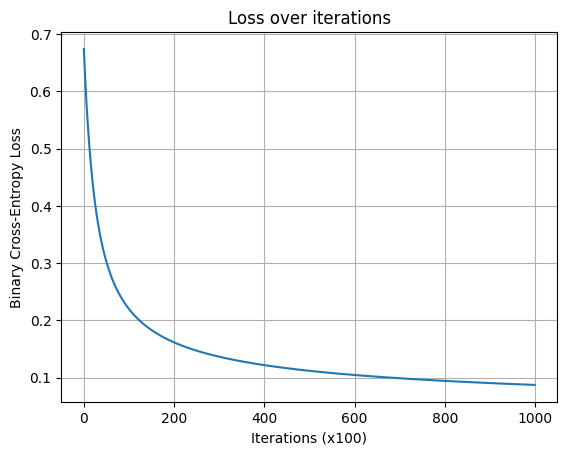

In [27]:
# Plot the loss history to evaluate training progress
def plot_loss(loss_history):
    """
    Plot the loss values over iterations.
    """
    plt.plot(loss_history)
    plt.title("Loss over iterations")
    plt.xlabel("Iterations (x100)")
    plt.ylabel("Binary Cross-Entropy Loss")
    plt.grid()
    plt.show()

plot_loss(model.loss_history)


In [28]:
# Make predictions using the trained model
predictions = model.predict(X)

# Print the actual vs predicted values
print("Actual vs Predicted:")
for i in range(10):  # Display the first 10 samples for simplicity
    print(f"Actual: {y[i]}, Predicted: {predictions[i]}")

Actual vs Predicted:
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1


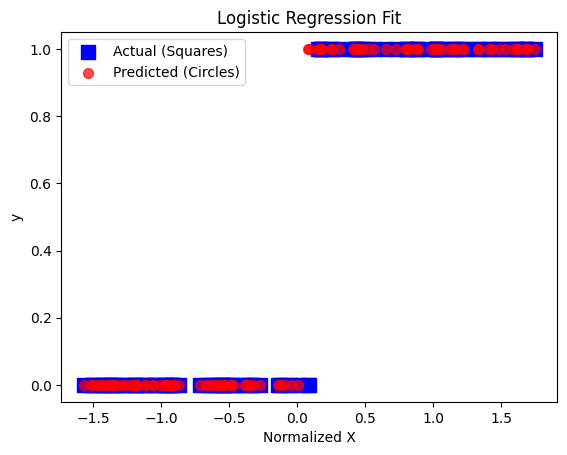

In [29]:
# Visualize the actual vs. predicted values
plt.scatter(X, y, color='blue', marker='s', s=100, label='Actual (Squares)')  # Actual values as larger squares
plt.scatter(X, predictions, color='red', marker='o', s=50, label='Predicted (Circles)', alpha=0.7)  # Predicted values as smaller circles
plt.title("Logistic Regression Fit")
plt.xlabel("Normalized X")
plt.ylabel("y")
plt.legend()
plt.show()

# When to Use Logistic Regression 🧩

Logistic Regression is a method used to solve classification problems. It’s helpful when we want to predict categories like "Yes" or "No" (e.g., Will a customer buy a product?).

- **Two Options (Binary)**: Logistic regression works well for tasks with two choices, like spam or not spam.

- **Straight Line Separation**: It works best when a straight line can separate the categories in the data.

- **Clear Probabilities**: Logistic regression tells us the chance (in percentage) that something belongs to a category.

- **Feature Scaling Helps**: Adjusting the data (scaling) can make the model faster and better.

- **Big Datasets**: Logistic regression can handle lots of data efficiently, especially when most data points are zeros (like in text data).

---

# Pros of Logistic Regression ✅

- **Easy to Understand**: The model shows how each feature (input) affects the result, which helps explain the predictions.

- **Quick to Train**: Logistic regression is fast and works well with medium to large datasets.

- **Good with Imbalanced Data**: If one category appears much more than the other (e.g., 90% "No" and 10% "Yes"), it can still work well with some adjustments.

- **Predicts Probabilities**: It doesn’t just say "Yes" or "No"; it also shows how confident it is about the answer.

- **Shows Feature Importance**: It tells us which features are most important for the prediction.

---

# Cons of Logistic Regression ❌

- **Straight Line Limitation**: If the data needs a curved boundary to separate categories, it won’t work well.

- **Sensitive to Outliers**: Odd data points (outliers) can confuse the model and affect predictions.

- **Needs Independent Features**: If two features are very similar, it can cause problems for the model.

- **Not for Complex Problems**: For very complicated patterns in the data, other models like decision trees or neural networks might be better.

- **Overfitting Risk**: If there are too many features and not enough data points, the model can memorize the data instead of learning patterns.

---

## Conclusion 🎯

Logistic Regression is a simple and effective model for predicting categories. It’s fast, easy to explain, and works well as a first model for many problems. But for more complex data or patterns, you might need to use a more advanced method.